<a href="https://colab.research.google.com/github/abidshafee/dataAnalysis/blob/master/dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Mockup Project
## What is Data Analysis
#### It is a process of **Inspecting**, **Cleaning**, **transforming**, and **Modeling** Data with the goal of discovering useful information, informing conclusion, and supporting decision-makiing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime as dt
import seaborn as sns
# import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving superstore_dataset2011-2015.csv to superstore_dataset2011-2015.csv


In [ ]:
df = pd.read_csv('superstore_dataset2011-2015.csv', encoding = 'unicode_escape', index_col='Row ID', parse_dates=['Order Date', 'Ship Date'])
# parsing Date Column as python Datetime formate

In [ ]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,,,
42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [ ]:
# Converting Order Date column to pandas datetime object
# pd.to_datetime(df['Order Date'])

In [ ]:
# Now lets create Year column accessing year from Order date
df['Year'] = df['Order Date'].dt.year

In [ ]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
Row ID,,,,,,,,,,,,,,,,,,,,,,,,
42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011


In [ ]:
df.describe(include='all')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,9994.000000,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,NaN,7,13,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4,NaN
top,CA-2014-100111,2014-06-18 00:00:00,2014-11-22 00:00:00,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,NaN,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN
freq,14,135,130,30775,97,108,26518,915,2001,9994,NaN,11002,11117,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433,NaN
first,NaN,2011-01-01 00:00:00,2011-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-12-31 00:00:00,2015-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN,2012.777208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN,1.098931
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN,2012.000000


In [ ]:
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [ ]:
# df.loc[:, df['Category'] == 'Furniture']
df[['Category']]

,Category
Row ID,
42433,Office Supplies
22253,Office Supplies
48883,Office Supplies
11731,Office Supplies
22255,Furniture
...,...
32593,Office Supplies
47594,Office Supplies
8857,Office Supplies


In [ ]:
# I don't know what it is doing!
# dict(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 42433 to 36388
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15

In [ ]:
df.isnull().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Year                  0
dtype: int64

isnull method by default accept axis argument = 0, means axis=0, it indicates any operation through the row direction

In [ ]:
df[df['Postal Code'].isnull()]
# this will return number of all rows where Postal Code is null

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
Row ID,,,,,,,,,,,,,,,,,,,,,,,,
42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27700,IN-2014-23754,2014-12-31,2015-07-01,Standard Class,KM-16225,Kalyca Meade,Corporate,Shantou,Guangdong,China,NaN,APAC,North Asia,OFF-PA-10004727,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.380,1.41,Medium,2014
2143,MX-2014-108574,2014-12-31,2015-04-01,Standard Class,JB-16045,Julia Barnett,Home Office,Reynosa,Tamaulipas,Mexico,NaN,LATAM,North,OFF-LA-10004969,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.660,1.32,Medium,2014
47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,2014


In [ ]:
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [ ]:
df['Country'].unique() #.tolist()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

In [ ]:
df['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Bahrain             2
Swaziland           2
Burundi             2
Eritrea             2
South Sudan         2
Name: Country, Length: 147, dtype: int64

# Numerical Analysis and Visualization

In [ ]:
df['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

### Boxplot

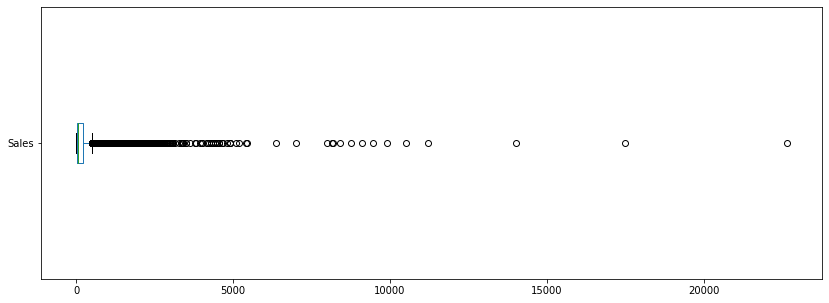

In [ ]:
cln_df = df.dropna(how='any')
# df['Sales'].plot(kind='box', vert=False, figsize=(14, 5))
cln_df['Sales'].plot(kind='box', vert=False, figsize=(14, 5))

In [ ]:
df['Profit'].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

In [ ]:
cln_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 34662 to 36388
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9994 non-null   object        
 1   Order Date      9994 non-null   datetime64[ns]
 2   Ship Date       9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Segment         9994 non-null   object        
 7   City            9994 non-null   object        
 8   State           9994 non-null   object        
 9   Country         9994 non-null   object        
 10  Postal Code     9994 non-null   float64       
 11  Market          9994 non-null   object        
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15 

In [ ]:
df['Profit'].mean()

28.61098247767566

### Distribution Plot

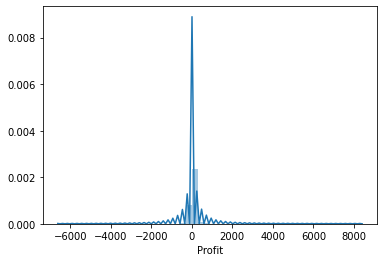

In [ ]:
sns.distplot(df['Profit'])

### Density Plot

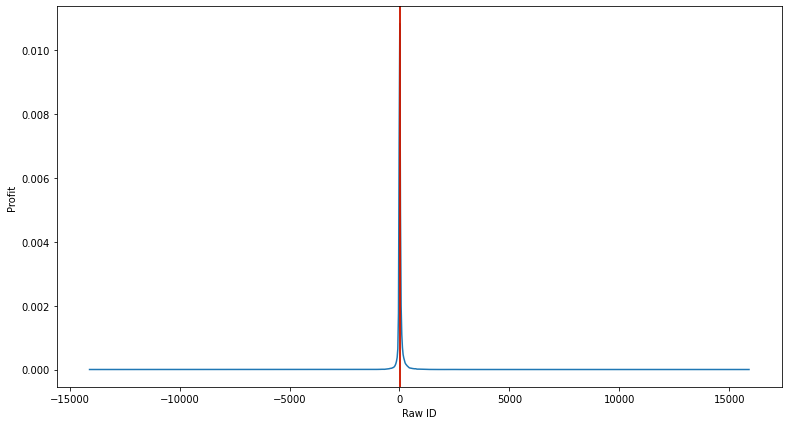

In [ ]:
var = df['Profit'].plot(kind='density', figsize=(13, 7))
var.set_xlabel('Raw ID')
var.set_ylabel('Profit')
var.axvline(df['Profit'].mean(), color='green')
var.axvline(df['Profit'].median(), color='red')

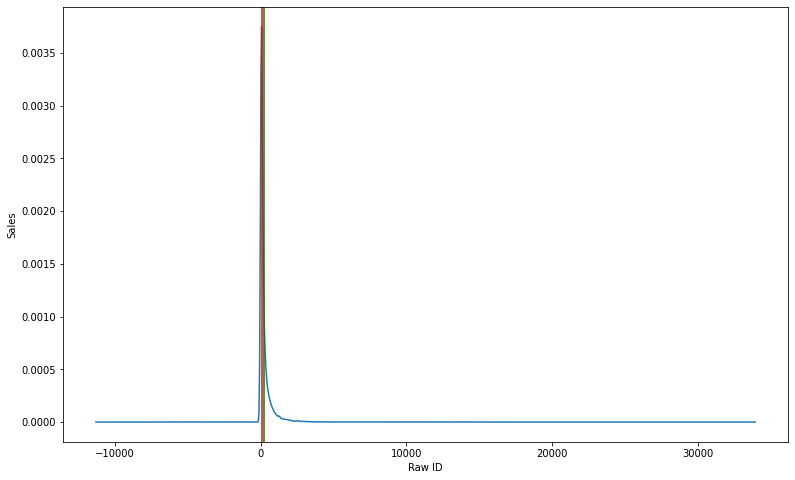

In [ ]:
var2 = df['Sales'].plot(kind='density', figsize=(13, 8))
var2.set_xlabel('Raw ID')
var2.set_ylabel('Sales')
var2.axvline(df['Sales'].mean(), color='green')
var2.axvline(df['Sales'].median(), color='red')

Inabove way we plotting directly using pandas 

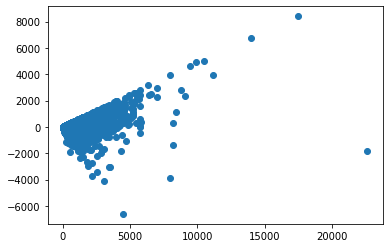

In [ ]:
plt.scatter(df['Sales'], df['Profit'])

In [ ]:
df['Category'].value_counts().plot(kind='pie', figsize=(8,8))

NameError: ignored

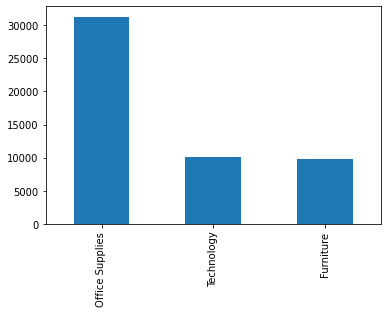

In [ ]:
df['Category'].value_counts().plot(kind='bar')

In [ ]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Year
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449,0.004539
Sales,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073,-0.002905
Quantity,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649,-0.005049
Discount,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056,-0.005894
Profit,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441,0.002626
Shipping Cost,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000,-0.003136
Year,0.004539,-0.002905,-0.005049,-0.005894,0.002626,-0.003136,1.000000


In [ ]:
# sns.heatmap(df)

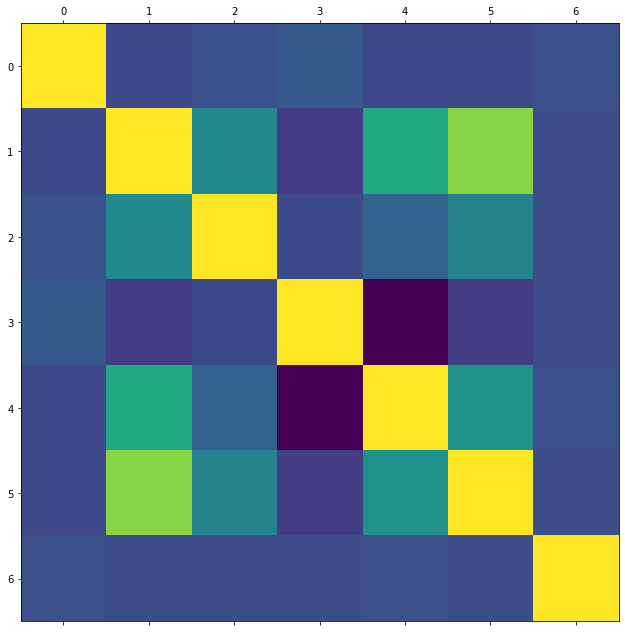

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.matshow(corr)

# fig = plt.figure(figsize=(11,11))

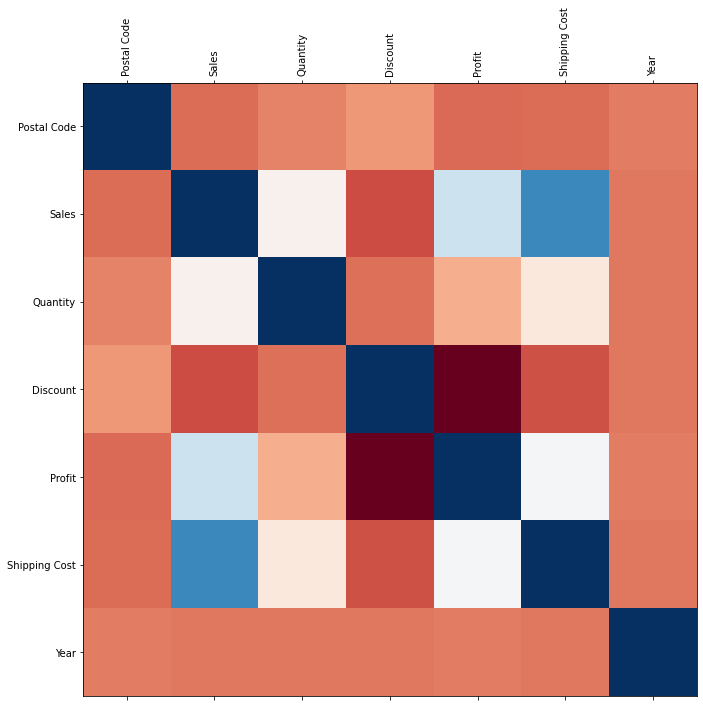

In [ ]:
fig = plt.figure(figsize=(11,11))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Dark blue indicates values are highly positively corelated
# Dark Red indicates values are highly negatively corelated

In [ ]:
# Slicing Data Frame
# Accessing all numeric column
sldf = df.iloc[:, 17:].head()
# ax = sns.heatmap(sldf)
sldf

,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
Row ID,,,,,,,
42433,408.300,2,0.0,106.140,35.46,Medium,2011
22253,120.366,3,0.1,36.036,9.72,Medium,2011
48883,66.120,4,0.0,29.640,8.17,High,2011
11731,44.865,3,0.5,-26.055,4.82,High,2011
22255,113.670,5,0.1,37.770,4.70,Medium,2011


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 42433 to 36388
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15

In [ ]:
cln_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
Row ID,,,,,,,,,,,,,,,,,,,,,,,,
34662,CA-2011-115161,2011-01-02,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,92691.0,US,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High,2011
37844,CA-2011-113880,2011-01-03,2011-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,Illinois,United States,60126.0,US,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.30,-172.1172,70.05,High,2011
31454,CA-2011-104269,2011-01-03,2011-06-03,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,Washington,United States,98115.0,US,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.20,51.4764,47.89,Medium,2011
39607,CA-2011-168312,2011-01-03,2011-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,United States,77036.0,US,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.30,-43.0296,32.70,Medium,2011
39245,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,United States,79907.0,US,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.30,0.0000,25.22,Medium,2011


In [ ]:
# cln_df['Region'].value_counts().plot(kind='bar')

south_region = cln_df.loc[df['Region']=='South']
south_region.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
Row ID,,,,,,,,,,,,,,,,,,,,,,,,
33498,US-2011-165659,2011-01-06,2011-06-06,Standard Class,LT-17110,Liz Thompson,Consumer,Little Rock,Arkansas,United States,72209.0,US,South,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,881.93,7,0.0,229.3018,112.32,High,2011


### Number of unique values in ['Region'] column

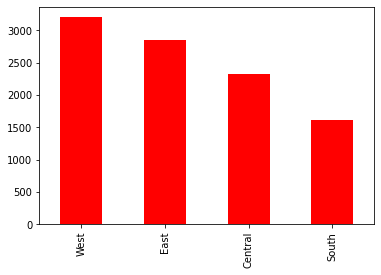

In [ ]:
cln_df['Region'].value_counts().plot(kind='bar', color='red')

In [ ]:
len(south_region)

1620

In [ ]:
south_region = len(cln_df.loc[cln_df['Region'] == 'South'])
central_region = len(cln_df.loc[cln_df['Region'] == 'Central'])
east_region = len(cln_df.loc[cln_df['Region'] == 'East'])
west_region = len(cln_df.loc[cln_df['Region'] == 'West'])

In [ ]:
print(f"Parcent of Sales in West Region: {round((west_region/(west_region+east_region+central_region+south_region)*100), 2)} % - Number of Sales: {west_region}")
print(f"Parcent of Sales in East Region: {round((east_region/(west_region+east_region+central_region+south_region)*100),2)} % - Number of Sales: {east_region}")
print(f"Parcent of Sales in Central Region: {round((central_region/(west_region+east_region+central_region+south_region)*100), 2)} % - Number of Sales: {central_region}")
print(f"Parcent of Sales in South Region: {round((south_region/(west_region+east_region+central_region+south_region)*100), 2)} % - Number of Sales: {south_region}")

Parcent of Sales in West Region: 32.05 % - Number of Sales: 3203
Parcent of Sales in East Region: 28.5 % - Number of Sales: 2848
Parcent of Sales in Central Region: 23.24 % - Number of Sales: 2323
Parcent of Sales in South Region: 16.21 % - Number of Sales: 1620


In [ ]:
cln_df['Discount']*=2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cln_df[['Discount']].head()

,Discount
Row ID,
34662,0.3
37844,0.6
31454,0.4
39607,0.6
39245,0.6


## Inserting second dataset

In [2]:
from google.colab import files
uploaded2= files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [3]:
df2 = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')

In [4]:
df2.describe(include='all')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,2823,2823.000000,2823,2823,2823,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,7,NaN,109,92,91,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,Classic Cars,NaN,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,967,NaN,52,259,259,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,NaN,100.715551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,NaN,40.187912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,NaN,124.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df2)

2823

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df2['PRODUCTLINE'].unique().tolist()

['Motorcycles',
 'Classic Cars',
 'Trucks and Buses',
 'Vintage Cars',
 'Planes',
 'Ships',
 'Trains']

Generating Random Number Using Numpy and then plot those number using matplotlib 

In [8]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

In [9]:
# len(y)
type(x)

numpy.ndarray

In [10]:
len(x)

500

Ploting those Random Number

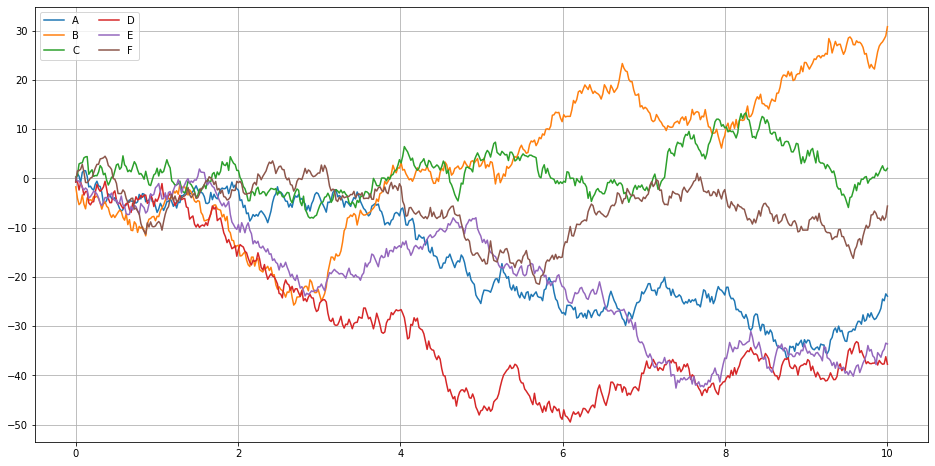

In [11]:
plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.grid()
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [12]:
cov = df2.corr()
cov

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


In [13]:
df2.tail(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


## Inserting Data using pandas loc[index] attributes
#### length of df2 is 2823, 0 to 2822
every colum in dataframe represents aseries object which is one dimentional array

In [14]:
df2.loc[2823] = [1110909,	49,	101.00,	14,	52005.27,	'',	
                 'Shipped',	4,	10,	2003,	'Motorcycles',	95,	'S10_1678',	
                 'Corporate Gift Ideas CA',	'6505551386', '7734 Strong St.',	'',	
                 'San Francisco',	'CA',	'',	'USA',	'',	'Abid', 'Shafekul',	'Medium']

In [15]:
df2.loc[2823]

ORDERNUMBER                         1110909
QUANTITYORDERED                          49
PRICEEACH                               101
ORDERLINENUMBER                          14
SALES                               52005.3
ORDERDATE                                  
STATUS                              Shipped
QTR_ID                                    4
MONTH_ID                                 10
YEAR_ID                                2003
PRODUCTLINE                     Motorcycles
MSRP                                     95
PRODUCTCODE                        S10_1678
CUSTOMERNAME        Corporate Gift Ideas CA
PHONE                            6505551386
ADDRESSLINE1                7734 Strong St.
ADDRESSLINE2                               
CITY                          San Francisco
STATE                                    CA
POSTALCODE                                 
COUNTRY                                 USA
TERRITORY                                  
CONTACTLASTNAME                 

In [16]:
df2.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium
2823,1110909,49,101.00,14,52005.27,,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas CA,6505551386,7734 Strong St.,,San Francisco,CA,,USA,,Abid,Shafekul,Medium


In [17]:
from bokeh.plotting import figure, output_file, show

In [18]:
from bokeh.io import output_notebook

In [19]:
output_notebook()